In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
from numba import njit
import oommfc as oc
from montecarlo.System import Grid, MCDrive

/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


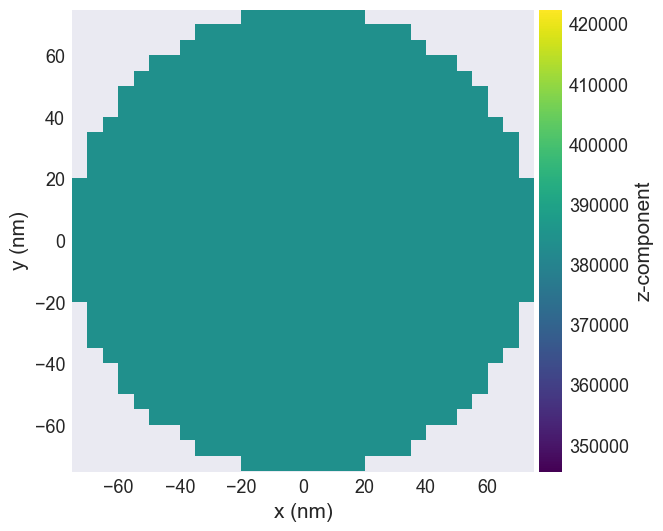

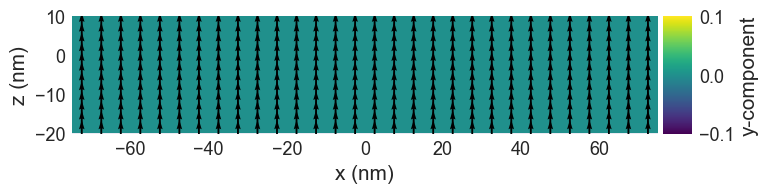

In [2]:
Ms = 3.84e5
A = 8.78e-12

d = 150e-9
hb = 20e-9
ht = 10e-9

cell = (5.0e-9, 5.0e-9, 2.5e-9)

subregions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)), 'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}

p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)

mesh = df.Mesh(p1=p1, p2=p2, cell=cell, subregions=subregions)

def Ms_fun(point):
    x, y, z = point
    if x**2 + y**2 < (d/2)**2:
        return Ms
    else:
        return 0

system = mm.System(name='bloch_point')

D_bloch = {'r1': -1.58e-3, 'r2': 1.58e-3, "r1:r2": 1.58e-9}

system.energy = mm.Exchange(A=A) + mm.DMI(D=D_bloch, crystalclass='T')
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

system.m.plane('z').mpl()
system.m.plane('y').mpl()

Running OOMMF (ExeOOMMFRunner)[2023/08/15 21:42]... (2.4 s)


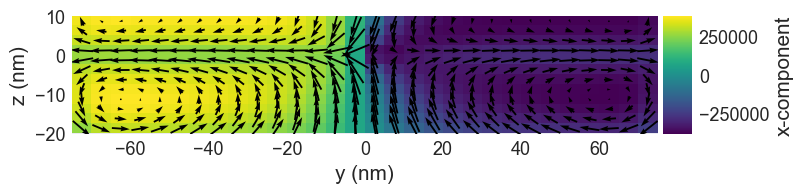

In [3]:
md = oc.MinDriver()
md.drive(system)
system.m.plane('x').mpl()

In [3]:
regions = {'r1': (-hb, 0), 'r2': (0, ht)}

In [4]:
print(system.m.mesh.subregions)

{'r1': Region(p1=(-7.5e-08, -7.5e-08, -2e-08), p2=(7.5e-08, 7.5e-08, 0)), 'r2': Region(p1=(-7.5e-08, -7.5e-08, 0), p2=(7.5e-08, 7.5e-08, 1e-08))}


In [5]:
print(system.m.norm.value[0, 0, 0])

[0.]


In [6]:
data = Grid(system, Ms=Ms, regions=regions)

In [7]:
schedule6 = {'type': 'HFC', 'start_temp': 2.01, 'end_temp': 0.001, 'start_field': [0,0,-1e6], 'end_field': [0, 0, 0], 'steps': 10}
schedule5 = {'type': 'FC', 'start_temp': 0.01, 'end_temp': 5.001, 'steps': 3}

In [8]:
mc = MCDrive(data, energy_calc=5, schedule_name='blochness', schedule=schedule6)

Schedule initialized: HFC
Start temperature: 2.01K
Steps: 10
End temperature will be 0.0K in -0.2009K per steps.
Start field: -1000000.0 A/m
End field will be: 0.0 in 100000.0 A/m per steps.


Step: 0, Temperature: 2.01K, Field: -1000000.0
Step: 1, Temperature: 1.81K, Field: -900000.0
Step: 2, Temperature: 1.61K, Field: -800000.0
Step: 3, Temperature: 1.41K, Field: -700000.0
Step: 4, Temperature: 1.21K, Field: -600000.0
Step: 5, Temperature: 1.01K, Field: -500000.0
Step: 6, Temperature: 0.8K, Field: -400000.0
Step: 7, Temperature: 0.6K, Field: -300000.0
Step: 8, Temperature: 0.4K, Field: -200000.0
Step: 9, Temperature: 0.2K, Field: -100000.0
Step: 10, Temperature: 0.0K, Field: 0.0


/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/discretisedfield/plotting/mpl.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


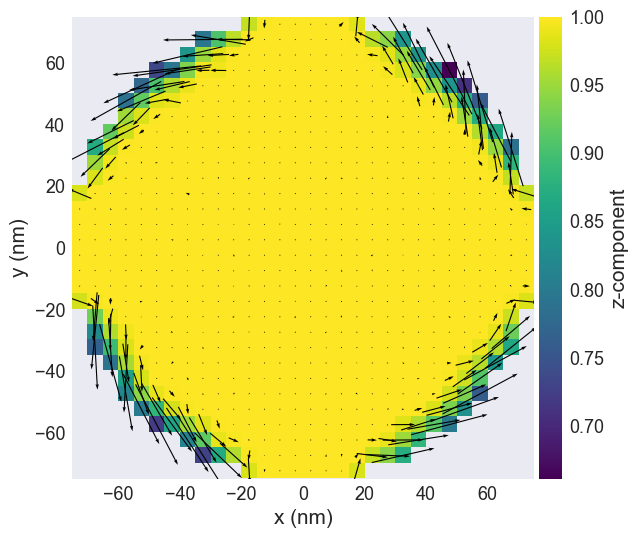

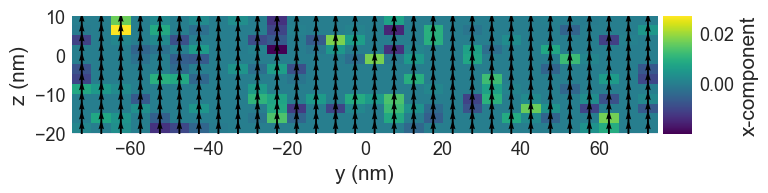

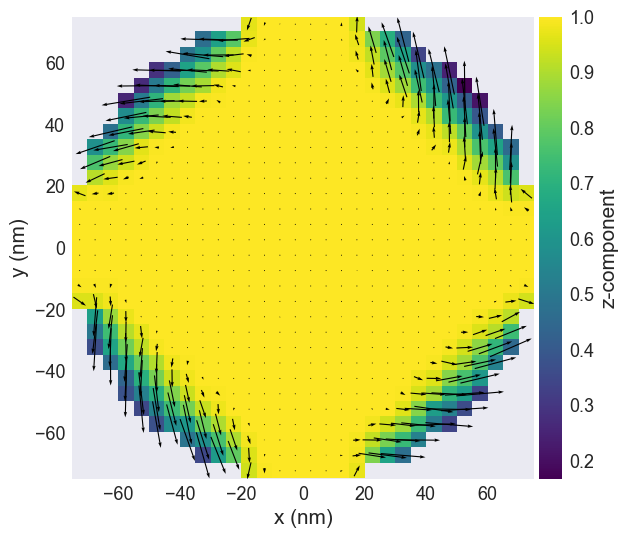

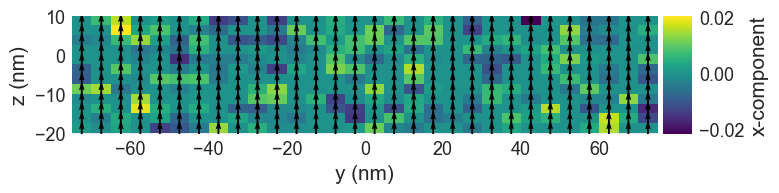

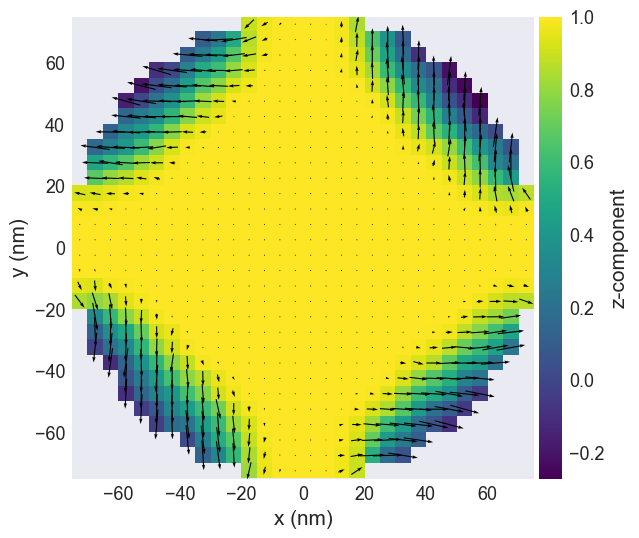

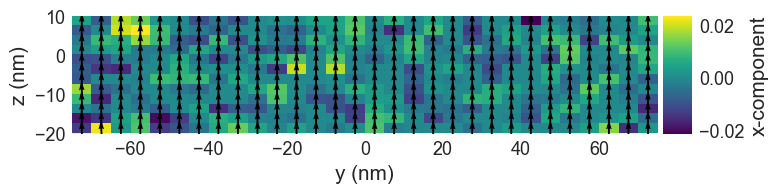

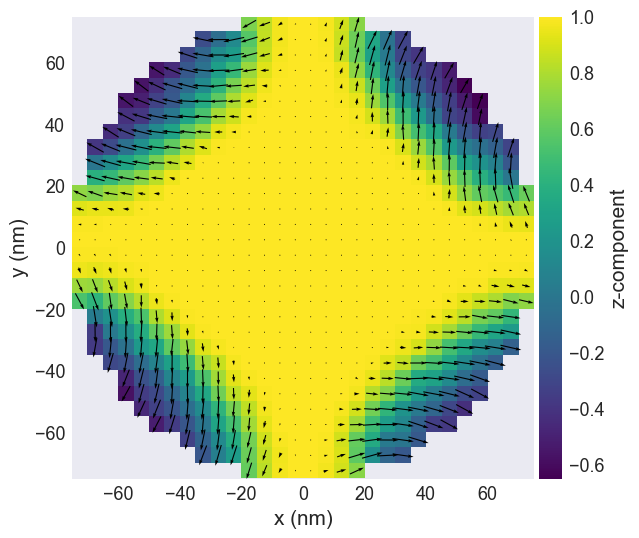

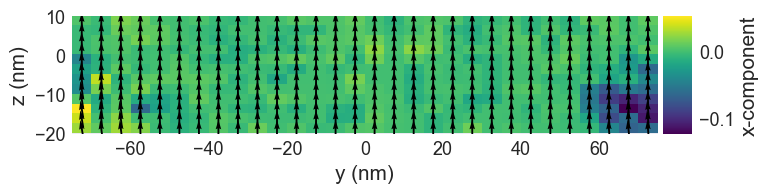

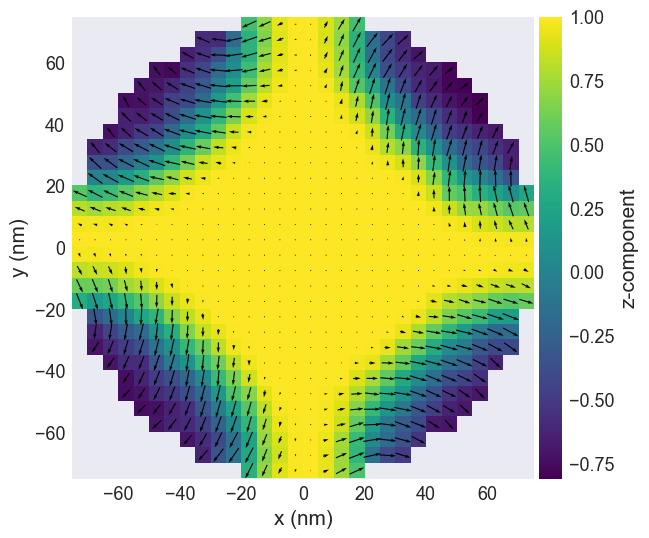

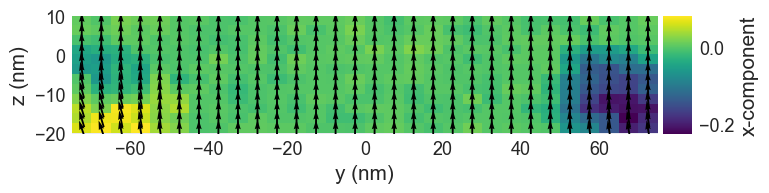

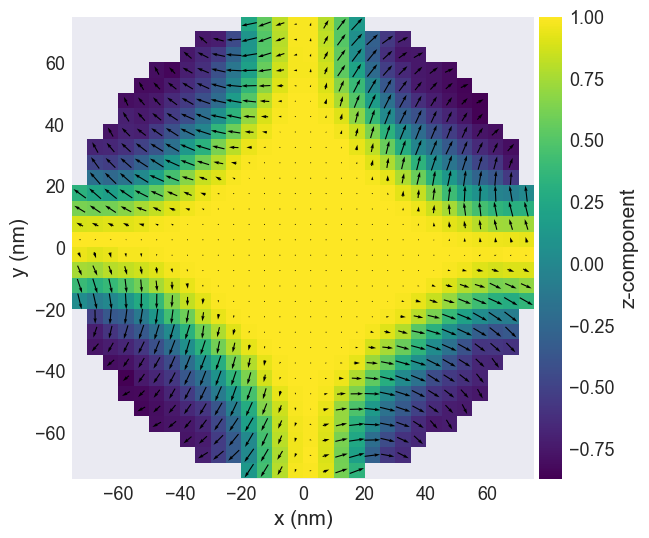

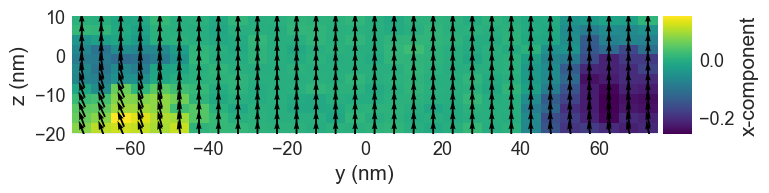

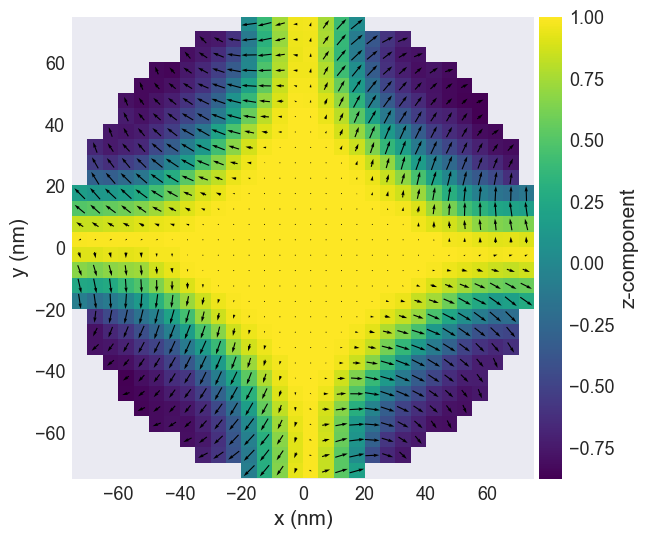

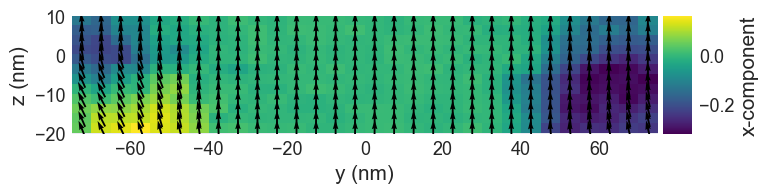

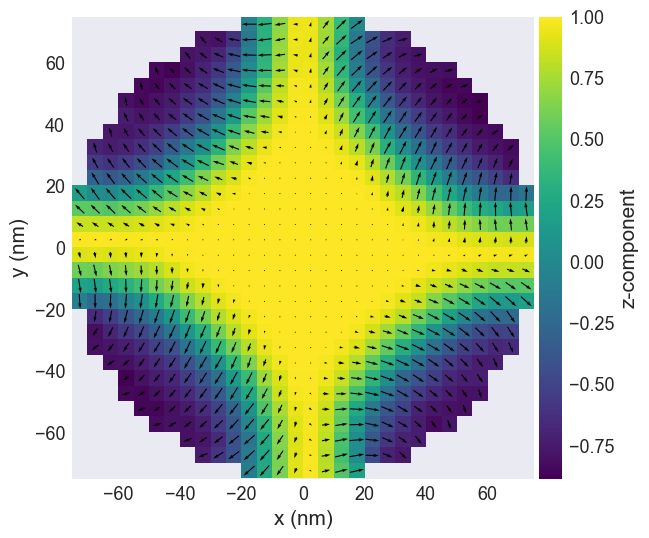

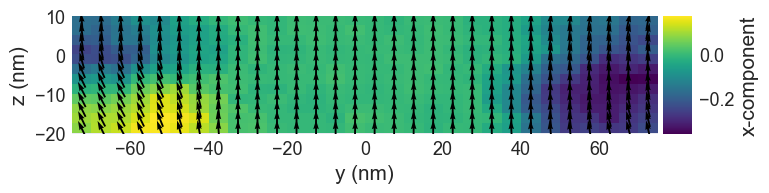

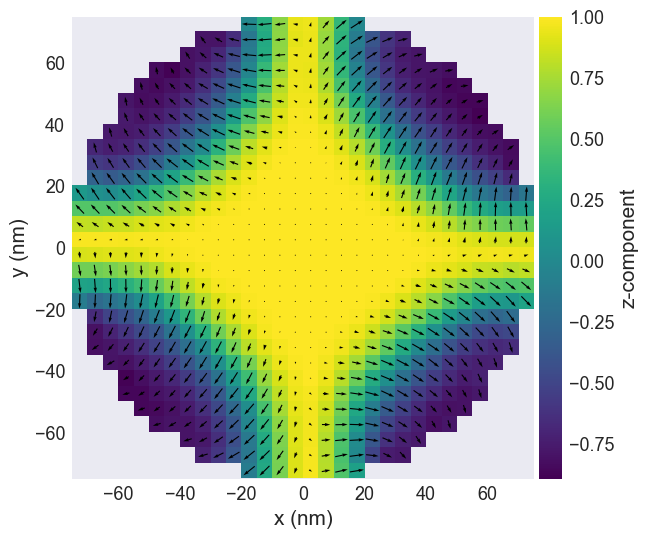

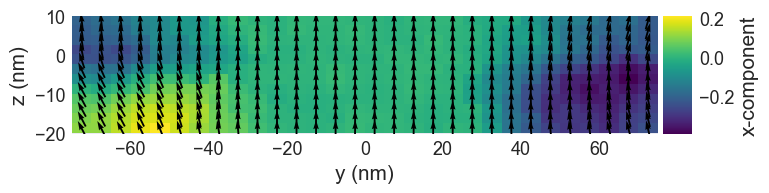

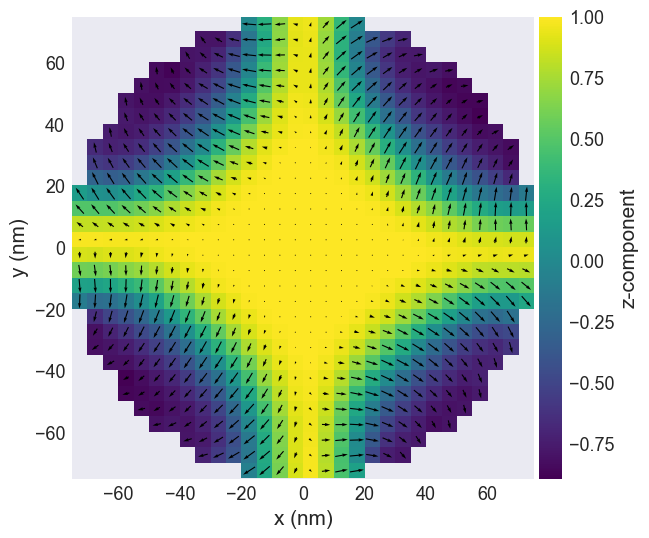

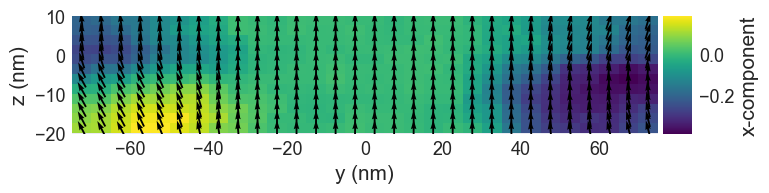

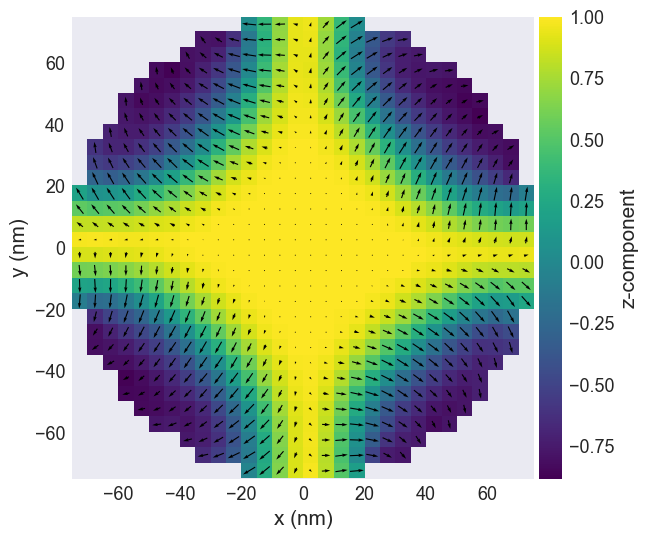

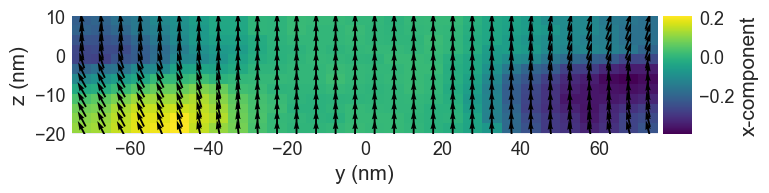

In [9]:
mc.drive(N=30000000, save=True, plot_x=True, plot_z=True)